In [1]:
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd

Using TensorFlow backend.


In [2]:
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(2017)  
rn.seed(12345)

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1, allow_soft_placement=True, device_count = {'CPU': 1})

from keras import backend as K

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [3]:
xy = pd.read_csv('CSV.csv')
print(xy.head(10))

         Date    Open    High     Low   Close  Adj Close   Volume
0  1996-08-09  14.250  16.750  14.250  16.500  15.324463  1601500
1  1996-08-12  16.500  16.750  16.375  16.500  15.324463   260900
2  1996-08-13  16.500  16.750  16.375  16.375  15.208362   162800
3  1996-08-14  16.375  16.625  16.375  16.375  15.208362    59500
4  1996-08-15  16.625  16.625  16.375  16.625  15.440549    62300
5  1996-08-16  16.375  16.625  16.375  16.375  15.208362    40600
6  1996-08-19  16.375  16.750  16.375  16.750  15.556649   381500
7  1996-08-20  16.750  17.250  16.500  17.250  16.021025   115000
8  1996-08-21  17.250  17.625  17.000  17.625  16.369308   167600
9  1996-08-22  17.625  17.875  17.375  17.875  16.601496    42400


In [4]:
xy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5.672000e+03
mean,11.837339,12.003313,11.669973,11.839539,11.262645,6.335628e+04
std,8.483014,8.567067,8.399875,8.481847,8.222966,8.749770e+04
min,1.187500,1.312500,1.062500,1.187500,1.102897,0.000000e+00
25%,4.750000,4.810000,4.670000,4.750000,4.411587,1.850000e+04
50%,7.370000,7.500000,7.210000,7.405000,6.943535,3.985000e+04
75%,20.000000,20.250000,19.625000,20.000000,19.145096,7.900000e+04
max,29.000000,29.250000,28.840000,29.000000,28.184065,2.073400e+06


In [5]:
print(xy.shape)
#xy=xy.drop(['Unnamed: 0'], axis=1)

(5672, 7)


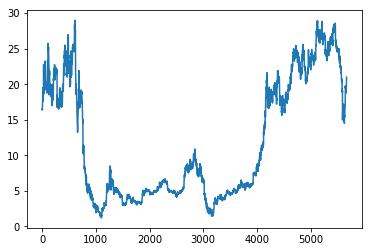

In [6]:
dataset=xy['Close']
plt.figure()
plt.plot(xy['Close'])

In [7]:
print(dataset)

0       16.500000
1       16.500000
2       16.375000
3       16.375000
4       16.625000
5       16.375000
6       16.750000
7       17.250000
8       17.625000
9       17.875000
10      18.750000
11      19.125000
12      19.500000
13      19.000000
14      18.500000
15      18.250000
16      17.750000
17      18.250000
18      17.625000
19      17.750000
20      18.000000
21      18.125000
22      18.000000
23      18.375000
24      18.750000
25      19.625000
26      20.750000
27      22.750000
28      21.500000
29      19.500000
          ...    
5642    16.639999
5643    16.980000
5644    16.860001
5645    16.990000
5646    17.000000
5647    19.260000
5648    19.629999
5649    19.680000
5650    19.660000
5651    19.750000
5652    19.430000
5653    19.680000
5654    19.709999
5655    19.610001
5656    19.450001
5657    19.709999
5658    19.740000
5659    19.750000
5660    19.410000
5661    19.290001
5662    18.740000
5663    18.920000
5664    19.379999
5665    19.410000
5666    19

In [8]:
dataset[:10]

0    16.500
1    16.500
2    16.375
3    16.375
4    16.625
5    16.375
6    16.750
7    17.250
8    17.625
9    17.875
Name: Close, dtype: float64

In [9]:
dataset = np.asarray(dataset)
dataset = np.reshape(dataset,(5672,1))

In [10]:
(dataset.shape)

(5672, 1)

In [11]:
print(dataset)

[[16.5     ]
 [16.5     ]
 [16.375   ]
 ...
 [19.92    ]
 [20.190001]
 [21.      ]]


In [12]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
dataset = scaler2.fit_transform(dataset)

In [13]:
dataset[:10]

array([[0.5505618 ],
       [0.5505618 ],
       [0.54606742],
       [0.54606742],
       [0.55505618],
       [0.54606742],
       [0.55955056],
       [0.57752809],
       [0.59101124],
       [0.6       ]])

In [14]:
np.array(dataset[:10,0])

array([0.5505618 , 0.5505618 , 0.54606742, 0.54606742, 0.55505618,
       0.54606742, 0.55955056, 0.57752809, 0.59101124, 0.6       ])

In [15]:
time_steps = 30
final_data = []
for i in range(len(dataset)-time_steps):
    final_data.append((np.array(dataset[i:i+time_steps,0])))

In [16]:
print(final_data)

[array([0.5505618 , 0.5505618 , 0.54606742, 0.54606742, 0.55505618,
       0.54606742, 0.55955056, 0.57752809, 0.59101124, 0.6       ,
       0.63146067, 0.64494382, 0.65842697, 0.64044944, 0.62247191,
       0.61348315, 0.59550562, 0.61348315, 0.59101124, 0.59550562,
       0.60449438, 0.60898876, 0.60449438, 0.61797753, 0.63146067,
       0.66292135, 0.70337079, 0.7752809 , 0.73033708, 0.65842697]), array([0.5505618 , 0.54606742, 0.54606742, 0.55505618, 0.54606742,
       0.55955056, 0.57752809, 0.59101124, 0.6       , 0.63146067,
       0.64494382, 0.65842697, 0.64044944, 0.62247191, 0.61348315,
       0.59550562, 0.61348315, 0.59101124, 0.59550562, 0.60449438,
       0.60898876, 0.60449438, 0.61797753, 0.63146067, 0.66292135,
       0.70337079, 0.7752809 , 0.73033708, 0.65842697, 0.64044944]), array([0.54606742, 0.54606742, 0.55505618, 0.54606742, 0.55955056,
       0.57752809, 0.59101124, 0.6       , 0.63146067, 0.64494382,
       0.65842697, 0.64044944, 0.62247191, 0.61348315, 0.

In [17]:
final_data = np.array(final_data)
print(np.shape(np.array(final_data)))

(5642, 30)


In [18]:
final_data[:2]

array([[0.5505618 , 0.5505618 , 0.54606742, 0.54606742, 0.55505618,
        0.54606742, 0.55955056, 0.57752809, 0.59101124, 0.6       ,
        0.63146067, 0.64494382, 0.65842697, 0.64044944, 0.62247191,
        0.61348315, 0.59550562, 0.61348315, 0.59101124, 0.59550562,
        0.60449438, 0.60898876, 0.60449438, 0.61797753, 0.63146067,
        0.66292135, 0.70337079, 0.7752809 , 0.73033708, 0.65842697],
       [0.5505618 , 0.54606742, 0.54606742, 0.55505618, 0.54606742,
        0.55955056, 0.57752809, 0.59101124, 0.6       , 0.63146067,
        0.64494382, 0.65842697, 0.64044944, 0.62247191, 0.61348315,
        0.59550562, 0.61348315, 0.59101124, 0.59550562, 0.60449438,
        0.60898876, 0.60449438, 0.61797753, 0.63146067, 0.66292135,
        0.70337079, 0.7752809 , 0.73033708, 0.65842697, 0.64044944]])

In [19]:
final_data.shape

(5642, 30)

  # SPLIT 1

In [20]:
num_splits = 5
size_of_block = (int)(len(final_data)/num_splits)
print("Split size is {}".format(size_of_block))
trainX1,trainY1 = final_data[:2256,0:29],final_data[:2256,[29]]
testX1,testY1 = final_data[2256:3384,0:29],final_data[2256:3384,[29]]

Split size is 1128


In [21]:
trainX1.shape

(2256, 29)

In [22]:
trainX1

array([[0.5505618 , 0.5505618 , 0.54606742, ..., 0.70337079, 0.7752809 ,
        0.73033708],
       [0.5505618 , 0.54606742, 0.54606742, ..., 0.7752809 , 0.73033708,
        0.65842697],
       [0.54606742, 0.54606742, 0.55505618, ..., 0.73033708, 0.65842697,
        0.64044944],
       ...,
       [0.18382022, 0.18525843, 0.18669663, ..., 0.18202247, 0.18202247,
        0.18417978],
       [0.18525843, 0.18669663, 0.18561798, ..., 0.18202247, 0.18417978,
        0.18310112],
       [0.18669663, 0.18561798, 0.18453933, ..., 0.18417978, 0.18310112,
        0.18741573]])

In [23]:
trainY1.shape

(2256, 1)

In [24]:
trainY1

array([[0.65842697],
       [0.64044944],
       [0.62696629],
       ...,
       [0.18310112],
       [0.18741573],
       [0.18741573]])

In [25]:
testX1.shape

(1128, 29)

In [26]:
trainX1 = np.reshape(trainX1, (trainX1.shape[0], 1, trainX1.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))

In [27]:
trainX1.shape

(2256, 1, 29)

In [28]:
trainX1

array([[[0.5505618 , 0.5505618 , 0.54606742, ..., 0.70337079,
         0.7752809 , 0.73033708]],

       [[0.5505618 , 0.54606742, 0.54606742, ..., 0.7752809 ,
         0.73033708, 0.65842697]],

       [[0.54606742, 0.54606742, 0.55505618, ..., 0.73033708,
         0.65842697, 0.64044944]],

       ...,

       [[0.18382022, 0.18525843, 0.18669663, ..., 0.18202247,
         0.18202247, 0.18417978]],

       [[0.18525843, 0.18669663, 0.18561798, ..., 0.18202247,
         0.18417978, 0.18310112]],

       [[0.18669663, 0.18561798, 0.18453933, ..., 0.18417978,
         0.18310112, 0.18741573]]])

# SPLIT 2

In [30]:
trainX2,trainY2 = final_data[1128:3384,0:29],final_data[1128:3384,[29]]
testX2,testY2 = final_data[3384:4512,0:29],final_data[3384:4512,[29]]
trainX2 = np.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
testX2 = np.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

In [31]:
trainX2.shape

(2256, 1, 29)

# SPLIT 3

In [32]:
trainX3,trainY3 = final_data[2256:4512,0:29],final_data[2256:4512,[29]]
testX3,testY3 = final_data[4512:5642,0:29],final_data[4512:5642,[29]]
trainX3 = np.reshape(trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
testX3 = np.reshape(testX3, (testX3.shape[0], 1, testX3.shape[1]))

In [33]:
trainX3.shape

(2256, 1, 29)

# SPLIT 4

In [34]:
trainX4,trainY4 = final_data[3384:,0:29],final_data[3384:,[29]]
trainX4 = np.reshape(trainX4, (trainX4.shape[0], 1, trainX4.shape[1]))

In [35]:
trainX4.shape

(2258, 1, 29)

# BIDIRECTIONAL MODEL

In [36]:
from keras.layers import Bidirectional
from keras.optimizers import Adam,SGD
from keras import optimizers
from keras import regularizers

In [37]:
import random
random.seed(5)

In [51]:
model = Sequential()
look_back = 29

In [52]:
model.add(Bidirectional(LSTM(29,input_shape = (1,look_back),kernel_regularizer = regularizers.l2(0.01),activity_regularizer = regularizers.l1(0.01))))
model.add(Dense(1))

# Training on split 1 

In [54]:
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mape'])
history1 = model.fit(trainX1, trainY1, epochs=10,validation_data = (testX1,testY1), batch_size=1, verbose=2)

Train on 2256 samples, validate on 1128 samples
Epoch 1/10
 - 20s - loss: 0.0535 - mean_absolute_percentage_error: 10411.4009 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 10.3447
Epoch 2/10
 - 17s - loss: 0.0076 - mean_absolute_percentage_error: 18527.7288 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 12.1903
Epoch 3/10
 - 17s - loss: 0.0062 - mean_absolute_percentage_error: 17107.2151 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 14.0498
Epoch 4/10
 - 17s - loss: 0.0054 - mean_absolute_percentage_error: 16018.7975 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 10.6054
Epoch 5/10
 - 17s - loss: 0.0048 - mean_absolute_percentage_error: 9459.3045 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 8.4738
Epoch 6/10
 - 17s - loss: 0.0045 - mean_absolute_percentage_error: 9657.8176 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 20.9799
Epoch 7/10
 - 17s - loss: 0.0040 - mean_absolute_percentage_error: 11377.3743 - val_loss: 0.0013 

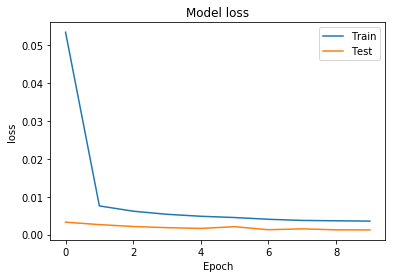

In [55]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [56]:
model.save("sb1_weights.h5")

In [57]:
trainPredict1 = model.predict(trainX1)

In [58]:
np.asarray(trainPredict1[:5])

array([[0.6541442 ],
       [0.65425116],
       [0.65206194],
       [0.6481424 ],
       [0.64613515]], dtype=float32)

In [59]:
np.savetxt('splitb_1_result.out', trainPredict1, delimiter=',') 

In [61]:
testPredict1 = model.predict(testX1)
np.savetxt('splitb_1_test_result.out', testPredict1, delimiter=',') 

In [62]:
from sklearn.metrics import mean_squared_error , r2_score

In [63]:
r2_score(testPredict1,testY1)

0.9760321373864922

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE1=mean_squared_error(testY1, testPredict1)
print("MSE:",MSE1)

RMSE1=sqrt(MSE1)
print("RMSE:",RMSE1)

MSE: 0.00014634030608224002
RMSE: 0.012097119743238058


In [65]:
trainPredict1 = scaler2.inverse_transform(trainPredict1)
trainY1 = scaler2.inverse_transform(trainY1)
testPredict1 = scaler2.inverse_transform(testPredict1)
testY1 = scaler2.inverse_transform(testY1)

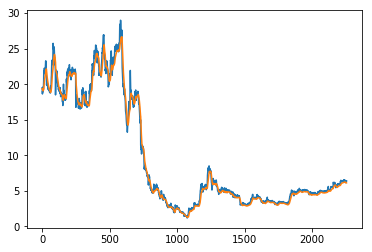

In [66]:
plt.plot(trainY1)
plt.plot(trainPredict1)
plt.show()

# Training on split 2

In [67]:
from keras.models import load_model

In [68]:
model = load_model('sb1_weights.h5') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 58)                13688     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 59        
Total params: 13,747
Trainable params: 13,747
Non-trainable params: 0
_________________________________________________________________


In [69]:
history2=model.fit(trainX2, trainY2, epochs=10, batch_size=1, validation_data = (testX2,testY2))

Train on 2256 samples, validate on 1128 samples
Epoch 1/10
2256/2256 [==============================] - 19s 9ms/step - loss: 8.3445e-04 - mean_absolute_percentage_error: 11.6065 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 6.1457
Epoch 2/10
2256/2256 [==============================] - 18s 8ms/step - loss: 7.8079e-04 - mean_absolute_percentage_error: 12.8736 - val_loss: 0.0044 - val_mean_absolute_percentage_error: 9.2373
Epoch 3/10
2256/2256 [==============================] - 18s 8ms/step - loss: 7.1555e-04 - mean_absolute_percentage_error: 12.3968 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 5.4052
Epoch 4/10
2256/2256 [==============================] - 18s 8ms/step - loss: 6.8877e-04 - mean_absolute_percentage_error: 12.3085 - val_loss: 0.0017 - val_mean_absolute_percentage_error: 4.9131
Epoch 5/10
2256/2256 [==============================] - 18s 8ms/step - loss: 6.3148e-04 - mean_absolute_percentage_error: 12.3697 - val_loss: 0.0023 - val_mean_absolute_percent

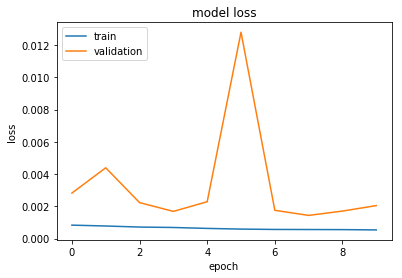

In [70]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
model.save('sb2_weights.h5') 

In [72]:
trainPredict2 = model.predict(trainX2)
testPredict2 = model.predict(testX2)

trainPredict2 = scaler2.inverse_transform(trainPredict2)
trainY2 = scaler2.inverse_transform(trainY2)
testPredict2 = scaler2.inverse_transform(testPredict2)
testY2 = scaler2.inverse_transform(testY2)

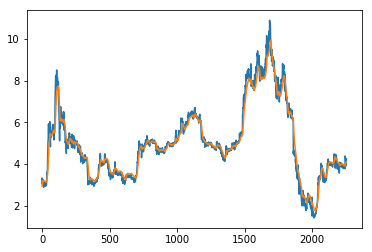

In [73]:
plt.plot(trainY2)
plt.plot(trainPredict2)
plt.show()

In [74]:
MSE2=mean_squared_error(testY2, testPredict2)
print("MSE:",MSE2)

RMSE2=sqrt(MSE2)
print("RMSE:",RMSE2)

R2_score2=r2_score(testY2, testPredict2)
print("R2 score:", R2_score2)

MSE: 1.022144874421375
RMSE: 1.0110118072611096
R2 score: 0.9712603700995265


# Training on split 3

In [75]:
model = load_model('sb2_weights.h5') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 58)                13688     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 59        
Total params: 13,747
Trainable params: 13,747
Non-trainable params: 0
_________________________________________________________________


In [76]:
history3 = model.fit(trainX3, trainY3, epochs=10, batch_size=1, validation_data = (testX3,testY3))

Train on 2256 samples, validate on 1130 samples
Epoch 1/10
2256/2256 [==============================] - 19s 9ms/step - loss: 0.0017 - mean_absolute_percentage_error: 11.0820 - val_loss: 0.0089 - val_mean_absolute_percentage_error: 9.5980
Epoch 2/10
2256/2256 [==============================] - 18s 8ms/step - loss: 0.0013 - mean_absolute_percentage_error: 9.3323 - val_loss: 0.0056 - val_mean_absolute_percentage_error: 6.7617
Epoch 3/10
2256/2256 [==============================] - 18s 8ms/step - loss: 0.0014 - mean_absolute_percentage_error: 9.6690 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 2.6198
Epoch 4/10
2256/2256 [==============================] - 18s 8ms/step - loss: 0.0014 - mean_absolute_percentage_error: 9.0943 - val_loss: 0.0150 - val_mean_absolute_percentage_error: 13.6200
Epoch 5/10
2256/2256 [==============================] - 18s 8ms/step - loss: 0.0013 - mean_absolute_percentage_error: 9.3377 - val_loss: 0.0063 - val_mean_absolute_percentage_error: 7.4903
Epoch

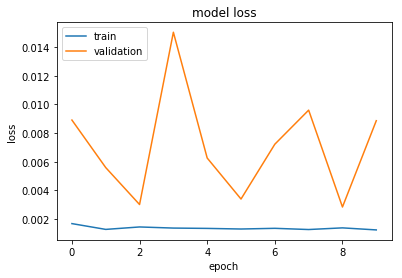

In [77]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
model.save('sb3_weights.h5') 


In [79]:
trainPredict3 = model.predict(trainX3)
testPredict3 = model.predict(testX3)

trainPredict3 = scaler2.inverse_transform(trainPredict3)
trainY3 = scaler2.inverse_transform(trainY3)
testPredict3 = scaler2.inverse_transform(testPredict3)
testY3 = scaler2.inverse_transform(testY3)

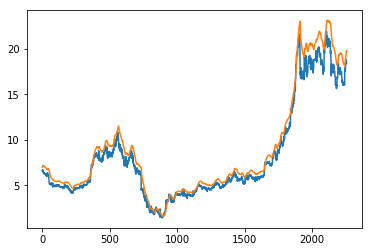

In [80]:
plt.plot(trainY3)
plt.plot(trainPredict3)
plt.show()

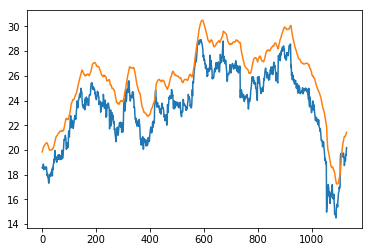

In [81]:
plt.plot(testY3)
plt.plot(testPredict3)
plt.show()

In [82]:
MSE3=mean_squared_error(testY3, testPredict3)
print("MSE:",MSE3)
RMSE3=sqrt(MSE3)
print("RMSE:",RMSE3)
R2_score3=r2_score(testY3, testPredict3)
print("R2 score:", R2_score3)

MSE: 5.02019903780001
RMSE: 2.2405800672593714
R2 score: 0.4420502946531919


# Training on split 4 

In [83]:
model = load_model('sb3_weights.h5') 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 58)                13688     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 59        
Total params: 13,747
Trainable params: 13,747
Non-trainable params: 0
_________________________________________________________________


In [84]:
history3 = model.fit(trainX4, trainY4, epochs=20, batch_size=1)

Epoch 1/20
2258/2258 [==============================] - 20s 9ms/step - loss: 0.0026 - mean_absolute_percentage_error: 4.7357
Epoch 2/20
2258/2258 [==============================] - 19s 8ms/step - loss: 0.0024 - mean_absolute_percentage_error: 4.2817
Epoch 3/20
2258/2258 [==============================] - 19s 9ms/step - loss: 0.0023 - mean_absolute_percentage_error: 4.1550
Epoch 4/20
2258/2258 [==============================] - 19s 8ms/step - loss: 0.0021 - mean_absolute_percentage_error: 4.0192
Epoch 5/20
2258/2258 [==============================] - 17s 8ms/step - loss: 0.0020 - mean_absolute_percentage_error: 3.8535
Epoch 6/20
2258/2258 [==============================] - 18s 8ms/step - loss: 0.0020 - mean_absolute_percentage_error: 4.0803
Epoch 7/20
2258/2258 [==============================] - 17s 7ms/step - loss: 0.0019 - mean_absolute_percentage_error: 4.0096
Epoch 8/20
2258/2258 [==============================] - 17s 8ms/step - loss: 0.0018 - mean_absolute_percentage_error: 3.8353


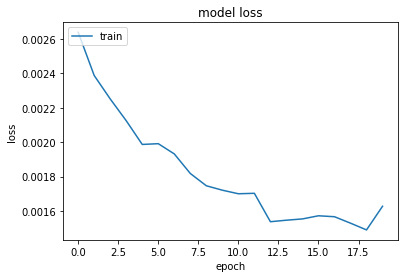

In [85]:
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()